# üé¨ Movie Tags Extraction with LDA Model
> This notebook performs an exploratory analysis to a Netflix movies and TV-shows dataset and applies the LDA model to extract the topic words from a given category of movie descriptions. 

- toc: true
- branch: master
- badges: true
- comments: true
- author: Shawn Shisen Yue
- categories: [fastpages, jupyter]

## Introduction 
***
As a movie fan, I‚Äôm always strict about selecting a movie for my scarce holidays. Instead of blindly choosing a blockbuster movie, I prefer to scrutinize the movie recommendation websites to choose a movie that might not be popular, but perfectly fits my desire. In the process of looking for movies, I find my focus usually falls on two sites‚Äî‚Äîthe tags attached to the movie and the comments from the viewers. It seems like sometimes apart from the category the movie is classified in, such as comedies, or romantic movies, the elements that appear in a movie are more helpful for my search. For instance, if the name ‚Äúsuspension film‚Äù appears on the recommendation page, I probably wouldn‚Äôt pay any attention to it, while if the tag ‚Äúpsychopathic killer‚Äù is added, I would be very likely to click in to see if that‚Äôs my target film. The accurate tags on the films can not only benefit the viewers, but they can also help improve the performance of recommendation systems and thus can indirectly boosts their profit. Considering that most movie fans are not selecting films simply based on the rough categories, or the genres, it might be more appropriate to push the films on the basis of the tags on the movies they‚Äôve recently seen. Furthermore, such a tag-attaching system also helps those movies with less popularity but with highlighted characteristics to gain more viewers, which could facilitate the diversification of the movie industry. 

Movies tagging has been researched extensively with natural language processing and machine learning methods. In a study by Khan et al.[1], they trained a Convolution Neural Network based on a carefully constructed tag vocabulary to extract the keywords from the keyframes in the movie, and achieved good accuracy in their evaluation. In a study conducted by Kar et al.[2], researchers came up with a model which can extract tags on the basis of a paragraph of synopses about the movie. The researchers found an obvious superiority in the relevance and attractiveness of the model‚Äôs outcome over the keywords extracted by humans. Moreover, they put forwards a list of requirements for the synopses used for tag-extraction. The result of this study demonstrates the feasibility of generating tags with a synopsis of the movie. 

This notebook is a preliminary attempt to create tags for movies found on Netflix based on information in the *Netflix Movies and TV Shows* dataset. In the project, I first imported and pre-processed the data by means of changing data types and creating lists and dictionaries. Then I conducted an exploratory data analysis to seek some relevance between the columns. In this process, I found some insights about the movie industry through plotting, such as the developing trend of the duration. Finally, by observation I found the descriptions of the movies, which mostly contain one or two sentences, reveal many key words of the movie and might be suitable for tag-producing. Specifically, I established a corpus which includes all words in the descriptions of the movies of the same category and used LDA model to give some featured words for that movie category. The result of this analysis shows the possibility of utilizing a paragraph of description to extract the topic words of a given category of movies.

## Methods
***
### Dataset Introduction
This notebook includes a movie dataset from <https://www.kaggle.com/datasets/shivamb/netflix-shows>, which consists of listings of all the **movies** and **TV-shows** available on **Netflix**, along with details such as - cast, directors, ratings, release year, duration, etc.

Specifically, here's the meaning of each column in the dataset:

    show_id: Unique ID for every Movie / Tv Show 
    type: Identifier - A Movie or TV Show
    title: Title of the Movie / Tv Show
    director: Director of the Movie
    cast: Actors involved in the movie / show
    country: Country where the movie / show was produced
    date_added: Date it was added on Netflix
    release_year: Actual Release year of the move / show
    rating: TV Rating of the movie / show
    duration: Total Duration - in minutes or number of seasons
    listed_in: Genere
    description: The summary description
    
### LDA model 
Latent Dirichlet allocation (LDA) is a widey used **topic-generating** model Cao et al.[3]. The model can identify the representative topics underlying a **document collection** or a **corpus**. This model produces topics based on **bag-of-word feature**, that each document is represented as a vector, in which every word corresponds to an id and its **appearing frequency** in the document. When producing the topics, The model samples a document-specific multinomial distribution over topics from Dirichlet distribution, and samples the word in the document from the corresponding multinomial distribution. 

Despite the extensive use of this model, it has some drawbacks. First, though the bag-of-word feature processes the text into digital information which is easy for modeling, it ignores the order between words and thus simplifies the problem. Moreover, the number of generated topic is hard to determine, so it's necessary to apply some other methods to evaluate the accuracy. This notebook uses LDA model to generate some descriptive word under a given topic name, which is a classified genere of movie in Netflix, so there's only one topic corresponding to a collection of document. 

## üìä Exploratory Analysis & Results
***

### 1. üé• Data Preprocessing

* **the libraries used** 

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import ipywidgets
import gensim
import re
import wordcloud

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models

* **import the dataset and Create a dataframe for movies**

In [3]:
df = pd.read_csv("data/netflix_titles.csv")
movies = df[df["type"]=="Movie"]
movies.index = range(len(movies))

* **column information**

In [5]:
#hide_input
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      5943 non-null   object
 4   cast          5656 non-null   object
 5   country       5691 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6129 non-null   object
 9   duration      6128 non-null   object
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
dtypes: int64(1), object(11)
memory usage: 574.9+ KB


* **missing values visualization**

<AxesSubplot:>

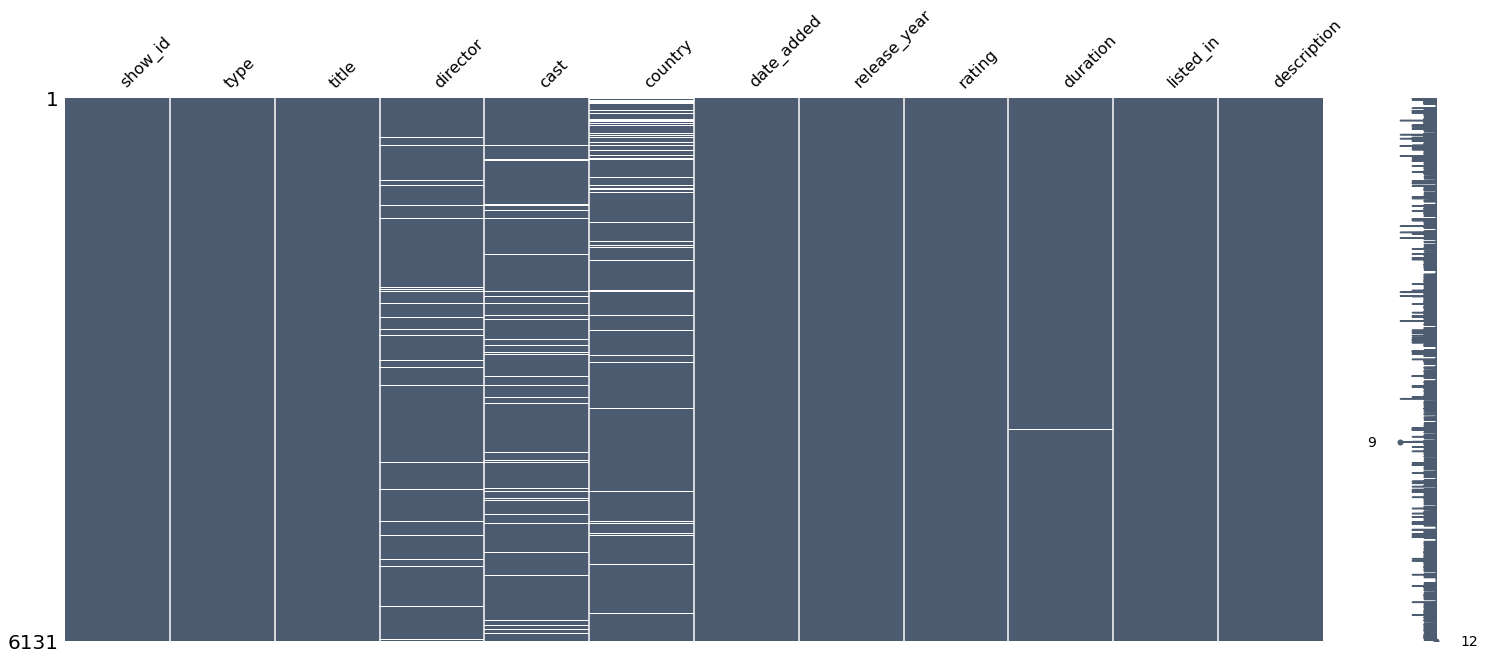

In [6]:
#hide_input
# Visualize the missing values in the dataframe.

import missingno as msno
msno.matrix(movies,color=(0.3,0.36,0.44))

**üçøÔ∏èComment**: The missing values are distributed in columns **"director"**, **"cast"**, **"country"** and **"duration"**. 

> sample rows

In [7]:
#hide_input
# Display several rows in the dataframe.

movies.sample(5)

show_id   type                            title                 director  \
5049   s7463  Movie                           Mirzya  Rakeysh Omprakash Mehra   
2290   s3560  Movie  Dave Chappelle: Sticks & Stones              Stan Lathan   
2519   s3992  Movie     The Super Parental Guardians             Joyce Bernal   
1414   s2183  Movie                 Tumi or not Tumi            Mfanelo Ngoma   
3481   s5432  Movie           The Russian Revolution              Cal Seville   

                                                   cast         country  \
5049  Harshvardhan Kapoor, Saiyami Kher, Anuj Choudh...           India   
2290                                     Dave Chappelle   United States   
2519  Vice Ganda, Coco Martin, Onyok Pineda, Awra Br...     Philippines   
1414                                        Tumi Morake             NaN   
3481                                      Jonathan Kydd  United Kingdom   

             date_added  release_year rating duration  \
5049  February 20, 2017          2016  TV-MA  129 min   
2290    August 26, 2019          2019  TV-MA   66 min   
2519     March 21, 2019          2016  TV-14  115 min   
1414     August 1, 2020          2020  TV-MA   72 min   
3481      June 15, 2017          2017  TV-PG   47 min   

                                              listed_in  \
5049     Dramas, International Movies, Music & Musicals   
2290                                    Stand-Up Comedy   
2519  Action & Adventure, Comedies, International Mo...   
1414                                    Stand-Up Comedy   
3481                                      Documentaries   

                                            description  
5049  A modern love story is connected to an ancient...  
2290  Dave Chappelle takes on gun culture, the opioi...  
2519  Following his best friend's death, Arci takes ...  
1414  Tumi Morake dishes out hot takes and fiery com...  
3481  Starting in 1881, this film describes how the ...

**üçøÔ∏èComment**: Through observation, I found the values in the column **"duration"** are strings, but are mostly digital information. Therefore I convert them into integers. Also, the values in **"date_added"** are strings, which are more appropriate to be displayed as the date values for subsequent plotting. 

In [8]:
#hide
for i in range(len(movies)):
    if type(movies.loc[i,'duration']) == str:
        movies.loc[i,'duration'] = int(movies.loc[i,'duration'].replace(' min', ''))

In [9]:
#hide
movies.sample()

show_id   type           title    director  \
5830   s8446  Movie  The Other Guys  Adam McKay   

                                                   cast        country  \
5830  Will Ferrell, Mark Wahlberg, Eva Mendes, Micha...  United States   

            date_added  release_year rating duration  \
5830  February 1, 2020          2010  PG-13      108   

                         listed_in  \
5830  Action & Adventure, Comedies   

                                            description  
5830  New York cops Allen and Terry toil in obscurit...

In [10]:
#hide
pd.to_datetime(movies['date_added'])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-23
          ...    
6126   2016-03-09
6127   2019-11-20
6128   2019-11-01
6129   2020-01-11
6130   2019-03-02
Name: date_added, Length: 6131, dtype: datetime64[ns]

### 2. üìàExploratory Analysis

### Visualization 1

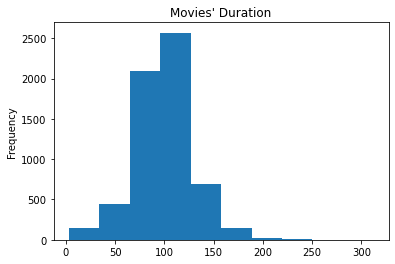

In [13]:
#hide_input
movies['duration'].plot(kind = 'hist')
plt.title("Movies' Duration")
plt.show()

**üçøÔ∏èComment**: The histogram shows that most movies on Netflix are about 100 minutes. The longest movie contained in this dataframe is about to reach 300 minutes, nearly 5 hours.

### Visualization 2

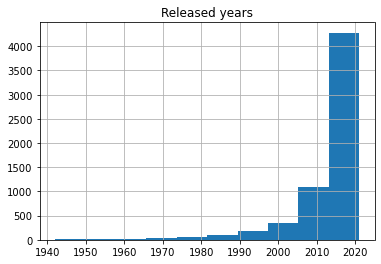

In [14]:
#hide_input
movies['release_year'].hist(xlabelsize = 10)
plt.title("Released years")
plt.show()

**üçøÔ∏èComment**: Most movies included in the dataframe are released in recent 10 years.

### Visualization 3

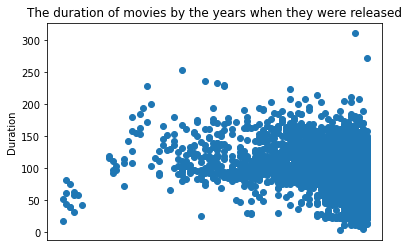

In [15]:
#hide_input
fig,ax = plt.subplots()
ax.scatter(movies['release_year'], movies['duration'])
ax.get_xaxis().set_visible(False)
ax.set_ylabel('Duration')
ax.set_title('The duration of movies by the years when they were released')
plt.show()

**üçøÔ∏èComment**: In this graph we can see that the duration of all movies shot in 1940s are below 100 minutes, while many movies released after 1960 are over 100 minutes. The length of a movie is strongly related to the narrative style, the length of the story, and the scale of the background setting. We can make a reasonable guess that the movie industry grew mature in 1950s, with the better shotting equipments and more experienced directors, which accounts for the increase of movies length in 1960s, that most movies' length surpass 100 minutes and the longest one even reaches 200 minutes. The short movies didn't quit the stage, however. In recent 10 years, there are still many movies with the duration below 50 minutes. 

### Visualization 4
Then Let's examine the values in "country" column.

In [16]:
#hide
movies = movies.rename(columns={"country":"country_or_region"})
movies.sample()

show_id   type             title       director  \
4555   s6829  Movie  Garuda Di Dadaku  Ifa Isfansyah   

                                                   cast country_or_region  \
4555  Emir Mahira, Maudy Koesnaedi, Ikranagara, Aldo...         Indonesia   

           date_added  release_year rating duration  \
4555  October 9, 2018          2009  TV-PG       96   

                                            listed_in  \
4555  Children & Family Movies, Dramas, Sports Movies   

                                            description  
4555  A determined boy will do anything to become a ...

In [17]:
#hide
# Create two list of movies to inlude the movies produced in mainland China and Hong Kong.

China_list = []
for i in range(6131):
    if "China" in movies['country_or_region'].astype(str).iloc[i]:
        China_list.append(i)
China = movies.iloc[China_list]
China.reset_index()

Hong_Kong_list = []
for i in range(6131):
    if "Hong Kong" in movies['country_or_region'].astype(str).iloc[i] and "China" not in movies['country_or_region'].astype(str).iloc[i]:
        Hong_Kong_list.append(i)
Hong_Kong = movies.iloc[Hong_Kong_list]
Hong_Kong.reset_index()

index show_id   type                         title  \
0      97    s160  Movie                Love in a Puff   
1     322    s487  Movie             Ratchet and Clank   
2    1013   s1550  Movie  The Professor and the Madman   
3    1055   s1621  Movie                    Peppermint   
4    1346   s2060  Movie                        Adrift   
..    ...     ...    ...                           ...   
58   5722   s8307  Movie         The Flying Guillotine   
59   5805   s8410  Movie                  The Mad Monk   
60   5934   s8570  Movie            The Young Vagabond   
61   6055   s8712  Movie                 Weeds on Fire   
62   6121   s8793  Movie                   Young Tiger   

                         director  \
0                  Pang Ho-cheung   
1   Jericca Cleland, Kevin Munroe   
2                  Farhad Safinia   
3                    Pierre Morel   
4               Baltasar Korm√°kur   
..                            ...   
58                    Meng Hua Ho   
59                      Johnny To   
60                     Sze Yu Lau   
61                   Chi Fat Chan   
62                         Mu Chu   

                                                 cast  \
0   Miriam Chin Wah Yeung, Shawn Yue, Singh Hartih...   
1   Paul Giamatti, John Goodman, Bella Thorne, Ros...   
2   Mel Gibson, Sean Penn, Natalie Dormer, Eddie M...   
3   Jennifer Garner, John Ortiz, John Gallagher Jr...   
4   Shailene Woodley, Sam Claflin, Jeffrey Thomas,...   
..                                                ...   
58  Kuan Tai Chen, Feng Ku, Hung Wei, Wu Chi Liu, ...   
59  Stephen Chow, Maggie Cheung, Anthony Wong Chau...   
60  Chia-Hui Liu, Wong Yu, Jason Pai Piao, Lung We...   
61  Liu Kai Chi, Lam Yiu-sing, Tony Tsz-Tung Wu, P...   
62  Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...   

                                    country_or_region          date_added  \
0                                           Hong Kong   September 1, 2021   
1                    Hong Kong, Canada, United States        July 9, 2021   
2   Ireland, France, Iceland, United States, Mexic...   December 15, 2020   
3                            Hong Kong, United States    December 1, 2020   
4                   Hong Kong, Iceland, United States   September 1, 2020   
..                                                ...                 ...   
58                                          Hong Kong       July 28, 2018   
59                                          Hong Kong     August 16, 2018   
60                                          Hong Kong     August 16, 2018   
61                                          Hong Kong  September 27, 2018   
62                                          Hong Kong    November 1, 2016   

    release_year rating duration  \
0           2010  TV-MA      103   
1           2016     PG       94   
2           2019  TV-14      125   
3           2018      R      102   
4           2018  PG-13       96   
..           ...    ...      ...   
58          1975  TV-MA      101   
59          1993  TV-14       85   
60          1985  TV-14       85   
61          2016  TV-MA       95   
62          1973     NR       81   

                                            listed_in  \
0              Comedies, Dramas, International Movies   
1   Children & Family Movies, Comedies, Sci-Fi & F...   
2                          Dramas, Independent Movies   
3                                  Action & Adventure   
4         Action & Adventure, Dramas, Romantic Movies   
..                                                ...   
58   Action & Adventure, Dramas, International Movies   
59   Comedies, International Movies, Sci-Fi & Fantasy   
60  Action & Adventure, Comedies, International Mo...   
61   Dramas, Independent Movies, International Movies   
62           Action & Adventure, International Movies   

                                          description  
0   When the Hong Kong government enacts a ban on ...  
1   Affable alien Rat

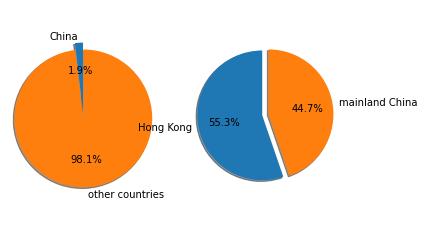

In [18]:
#hide_input
# Plot piecharts.

label1 = 'China', 'other countries'
label2 = 'Hong Kong', 'mainland China'
size1 = [114, 6017]
size2 = [63, 51]
explode = (0.1,0)  

fig, axs = plt.subplots(1, 2)
axs[0].pie(size1, explode=explode, labels=label1, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].pie(size2, explode=explode, labels=label2, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].axis('equal')
axs[1].axis('equal')
plt.show()

**üçøÔ∏èComment**: The left piechart shows that few movies produced in mainland China are available on Netflix. The right piechart shows the ratio of movies produced in Hong Kong to movies produced in mainland China. 

### Visualization 5
Then let's look at the data in "director" column.

In [20]:
#hide
# Create a dictionary to store the number of films each director shot. 

directors = {}
for i in range(len(movies)):
    if movies.loc[i,'director'] not in directors:
        directors[movies.loc[i,'director']] = 1
    else:
        directors[movies.loc[i,'director']] += 1

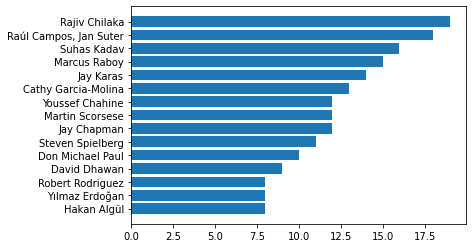

In [21]:
#hide_input
# Choose the top 15 directors according to the number of directors they produced in the dataframe. 

top_15_directors = sorted(directors.items(),key=lambda s:s[1],reverse=True)[1:16]
fig,ax = plt.subplots()
top_15 = [i[0] for i in top_15_directors]
movie_num = [j[1] for j in top_15_directors]
ax.barh(top_15,movie_num)
ax.invert_yaxis()
plt.show()

**üçøÔ∏èComments**: The names in the ranking is out of my prediction. As a fan of Christopher Nolan, I thought he should have been ranked very high, so I searched the number of his movies included in this dataframe.

In [72]:
#hide
directors['Christopher Nolan']

1

### Visualization 6

In [22]:
#hide
# First create a list containing the names of categories.

categories = []
for i in range(len(movies)):
    for w in movies.loc[i,'listed_in'].split(", "):
        if w not in categories:
            categories.append(w)

In [23]:
#hide
# Create a list storing the number of movies in each category. 

NumberByTypes = []
for i in range(len(categories)):
    count = 0
    for x in range(len(movies)):
        if categories[i] in movies.loc[x,'listed_in'].split(", "):
            count += 1
    NumberByTypes.append(count)

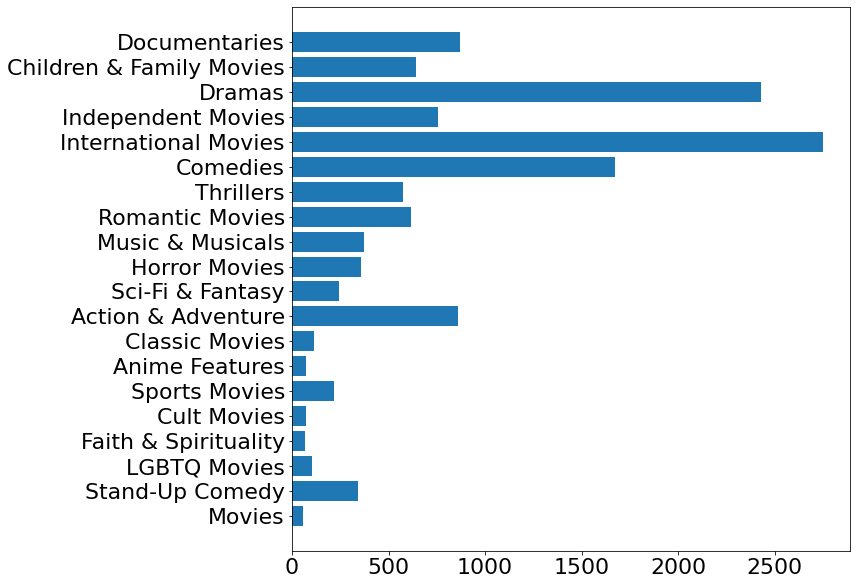

In [24]:
#hide_input
# Visualize the information.

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(categories,NumberByTypes)
ax.invert_yaxis()
plt.tick_params(labelsize=22)

**üçøÔ∏èComments**: 
1. Apart from those movies that have been clearly categorized, there's a type named "Movies", which suggests that movies in this type are not categorized due to some reason. We will examine the content of these movies and determine how should they be classified.
2. There aren't clear boundary between some of the categories, which means a movie can have multiple categories. The dim boundary may confuse the viewers and thus it's necessary to give these movies representative tags. 
3. Through the names of some categories we can roughly predict the content of the movies. For instance, Faith & Spirituality movies may contain a lot of religious elements. This provides the possibility for the afterwards tag prediction task based on the descriptions of movies.

### 3. üè∑ Tags Extraction

In this section, I used **the LDA model** to analyze the descriptions of a certain category of movie and extract the keywords to represent the category. Specifically, I first used **nltk** to preprocess the description texts. Then I made a **dictionary** and a **corpus** for the tokenized and stemmed words. Finally, I used the LDA model to extract the keywords depending on appearing frequency and drew the **word cloud** graph to visualize the result. 

In [25]:
# Create a list to store the descriptions of movies from different categories. 

DescByTypes = []
for i in range(len(categories)):
    DescByTypes.append([movies.loc[x,'description'] for x in range(len(movies)) if categories[i] in movies.loc[x,'listed_in'].split(', ')])

In [26]:
# First try to predict some tags for Documentaries.

Documentaries = DescByTypes[0]

In [27]:
# Create a list for tokenized words and remove those stop words.

myStopWords = list(punctuation) + stopwords.words('english')
Docu = []
for i in Documentaries:
    Docu.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])

In [28]:
# Stem the words in this list.

p_stemmer = PorterStemmer()
Docu_stemmed = []
for i in Docu:
    Docu_stemmed.append([p_stemmer.stem(w) for w in i])

In [29]:
# Create a dictionary for this document.

dictionary = corpora.Dictionary(Docu_stemmed)
dictionary.filter_extremes(no_below=5, no_above=0.5)

In [30]:
#collapse-output
print(dictionary.token2id)

{'comic': 0, 'death': 1, 'end': 2, 'face': 3, 'father': 4, 'filmmak': 5, 'help': 6, 'life': 7, 'stage': 8, 'way': 9, 'becam': 10, 'close': 11, 'document': 12, 'escap': 13, 'hitler': 14, 'presid': 15, 'reveal': 16, 'spain': 17, 'world': 18, "'s": 19, 'big': 20, 'childhood': 21, 'dream': 22, 'live': 23, 'love': 24, 'rescu': 25, 'train': 26, 'archiv': 27, 'champion': 28, 'documentari': 29, 'footag': 30, 'interview': 31, 'intim': 32, 'michael': 33, 'portrait': 34, 'trace': 35, 'bond': 36, 'extraordinari': 37, 'ideal': 38, 'meet': 39, 'tragic': 40, 'captur': 41, 'killer': 42, 'mother': 43, 'polic': 44, 'two': 45, 'victim': 46, 'women': 47, 'work': 48, 'chart': 49, 'legendari': 50, 'man': 51, 'stori': 52, 'use': 53, 'american': 54, 'challeng': 55, 'chang': 56, 'continu': 57, 'health': 58, 'tradit': 59, 'win': 60, 'gener': 61, 'last': 62, 'peopl': 63, 'togeth': 64, 'cultur': 65, 'examin': 66, 'famili': 67, 'hip-hop': 68, 'perform': 69, 'race': 70, 'rap': 71, 'song': 72, 'violenc': 73, "''": 7

In [31]:
# Make a corpus.

corpus = [dictionary.doc2bow(text) for text in Docu_stemmed]

In [32]:
# Train the lda model based on the dictionary and the corpus.

ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=1, 
                                           id2word = dictionary, 
                                           passes=5,
                                           random_state=1)

* **output generated**

In [33]:
ldamodel.show_topics(num_topics=1)

[(0,
  '0.039*"documentari" + 0.030*"\'s" + 0.012*"life" + 0.010*"world" + 0.010*"explor" + 0.010*"follow" + 0.009*"``" + 0.009*"\'\'" + 0.009*"film" + 0.007*"stori"')]

**üçøComment**: 
1. Some of the words such as "documentary", "explore", and "world" accurately reflect the content of this category, which proves the feasibility of this task.
2. There are many punctuations and uninformative words involved in this list, so the next step is to add these strings into myStopWords to remove them from the dictionary. 

* **modify the stop words list**

In [34]:
myStopWords.extend(["'s","'","¬∑","``",'"','‚Äî'])

* **repeat the steps above**

In [36]:
# Make an interactive visualization to reveal the predicted tags for each category.

Desc = []
for i in DescByTypes[19]:
    Desc.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])
p_stemmer = PorterStemmer()
Desc_stemmed = []
for i in Desc:
    Desc_stemmed.append([p_stemmer.stem(w) for w in i])
dictionary = corpora.Dictionary(Desc_stemmed)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in Desc_stemmed]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=1, 
                                           id2word = dictionary, 
                                           passes=5,
                                           random_state=1)
fig,ax = plt.subplots()

x = []
y = []
count = 0
for i in re.split(re.escape(' + ') + '|' + re.escape('*'), ldamodel.print_topics(num_topics=1, num_words=20)[0][1]):
    if count % 2 == 0:
        y.insert(0,float(i))
    else:
        x.insert(0,i)
    count += 1
ax.barh(x,y,height=0.5)
ax.set_title(categories[m])
plt.tight_layout()


interactive(children=(IntSlider(value=9, description='m', max=19), Output()), _dom_classes=('widget-interact',‚Ä¶

<function __main__.visualize1(m)>

**üçøComments**: 
1. The tag words in most categories can accurately reflect the content of the movies invovled in that category, such as "gay", "love" and "teen" for LGBTQ movies, "murder", "mystery", "secret" and "killer" for Thrillers and "team", "player", "soccer" and "champion" for sports movies. 
2. By adding those punctuations into myStopWords, there are mostly meaningful words in the graphs.
3. The "Movies" category that I mentioned before might be some movies themed on holidays, as there are keywords "friend", "christma" and "holiday" showing in the chart. 

* **visualiza the output with wordcloud graph**

In [38]:
#hide_input
# Visualize the tag words through wordcloud. 


Desc = []
for i in DescByTypes[0]:
    Desc.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])
p_stemmer = PorterStemmer()
Desc_stemmed = []
for i in Desc:
    Desc_stemmed.append([p_stemmer.stem(w) for w in i])
dictionary = corpora.Dictionary(Desc_stemmed)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in Desc_stemmed]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=1, 
                                           id2word = dictionary, 
                                           passes=5,
                                           random_state=1)

x = []
y = []
count = 0
for i in re.split(re.escape(' + ') + '|' + re.escape('*'), ldamodel.print_topics(num_topics=1, num_words=20)[0][1]):
    if count % 2 == 0:
        y.insert(0,float(i))
    else:
        x.insert(0,i)
    count += 1
plt.figure(figsize=(20,20))
frequencies = {}
for a in x:
    frequencies[a]=y[x.index(a)]
plt.title('The topics from different types of movies\n', fontsize=30, weight=600, color='#333d29')
wc = wordcloud.WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(x))
word_cloud = wc.generate_from_frequencies(frequencies)
plt.imshow(wc)

interactive(children=(IntSlider(value=9, description='m', max=19), Output()), _dom_classes=('widget-interact',‚Ä¶

<function __main__.visualize(m)>

**üçøComments**: 
The wordcloud graph really add much funs in this project and makes the outcome more readable. To be specific, I set the scale of the words to be aligned with the frequency they appeared in the document. Though there are still several meaningless marks and some of the words are not closely related to the category, there are still several useful words that can generalize the category. 

**üåüA Little Idea**:
After I've done this, it occurs to me a interesting game, which is to use mainly the words provided in the graph to form a sentence related to that category. For instance, we form a sentence related to Documentaries with the words in the first graph‚Äî‚Äî"Documentaries are footages about people exploring the world and telling their stories".

## Discussion
***
In this project, I successfully extracted the representative keywords from a list of movie descriptions with the LDA model, and visualize them through several word cloud graphs, displaying the feasibility of extracting the featured words from a set of short sentences. However, this project is still immature and could be improved in the following aspects. 

- First, based on the requirement on synopses come up with by Kar et al.[2], the synopses of the movies used for tag-extracting should be at least 10 sentences, as understanding stories from a very short text would be difficult for any learning system, so if extracting tags from a single movie is the next-step goal, then acquiring a set of more specific synopses is necessary. 

- Furthermore, there could be interdisciplinary methods applied, such as linguistics, to optimize the selection system. The selection of the keywords can be based on¬†more precise linguistic evidence. For instance, instead of depending solely on the appearing frequency, the model can add more parameters which involve semantic and syntactic knowledge to decide which word could be taken as a representative tag of the whole document.¬†

- In addition, an evaluation method is needed for more fine-grained modification of the system, such as comparing the outcome with tags attached by movie viewers collected from movie comment websites. 

A similar function of extracting tags from movies has already existed on recommendation websites like Douban, a renowned Chinese movie recommendation website. However, there is still possibilities to improve their performance in producing tags. First, the content in the movie shouldn‚Äôt be the only source to produce the tags. Instead, the comments that are posted by viewers are usually very informative and are helpful in finding the attractive points of the movie. To produce tags that better generalize the film and draw visitors‚Äô attention, the system can combine an extracting model with a sentiment-analyzing model, which allows it to extract tags from the comments that most probably contain the keywords for tagging. In addition, the tags for a movie shouldn‚Äôt be permanent, for the attraction of a film might change. People might focus on a different point just because of some issues of great social concerns. For example, the movie *The Dark Knight* was considered mainly an action movie which narrates a story of how a superhero beats criminals. As the movie has shown for a longer period, however, people understood further the significance underlying the superficial plots, that the humanity recorded in the film epitomizes the real society, sparking the consideration with respect to psychology and sociology. Thus the recommendation websites should regularly refresh the tags attached to a movie to follow up with society and keep vitality. 

The model established in this¬†project is not only a preliminary attempt to¬†extract tags from a short description of the movie, but also can be used to analyze the comments that are usually short to dynamically change the tags based on the views of the audiences. In the future, a movie recommendation system might operate based on the information reflected in the movie as well as the feedback of viewers, and a linguistic method to extract keywords would be involved. The generation of tags from movies could also be a vital step towards solving the problem of automated movie profile generation. Ultimately, the revolutionary change will contribute to a huge growth in the movie industry, rendering selecting a movie a rapid process and watching movies one of the major recreations. 

## References

[1] Khan, U. A., Ejaz, N., Mart√≠nez-del-Amor, M. A., & Sparenberg, H. (2017, August). Movies tags extraction using deep learning. In 2017 14th IEEE International Conference on Advanced Video and Signal Based Surveillance (AVSS) (pp. 1-6). IEEE.

[2] Kar, S., Maharjan, S., L√≥pez-Monroy, A. P., & Solorio, T. (2018). MPST: A corpus of movie plot synopses with tags. arXiv preprint arXiv:1802.07858.

[3] Cao, J., Xia, T., Li, J., Zhang, Y., & Tang, S. (2009). A density-based method for adaptive LDA model selection. Neurocomputing, 72(7-9), 1775-1781.